In [1]:
# -*- coding: utf-8 -*-

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

In [39]:
# machine learning
from sklearn.ensemble import RandomForestClassifier

# machine learning tools
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,recall_score,precision_score,f1_score, roc_curve
#from sklearn import grid_search
#from sklearn.grid_search import GridSearchCV

In [3]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [5]:
#combine is a list of dataset train and test. This will help cleansing all data
combine = [train, test]
#keep test PassengerID for the submission
p_id = test['PassengerId']

In [6]:
#Change odject to numbers
print(train['Sex'].value_counts(dropna=False))
print(test['Sex'].value_counts(dropna=False))

male      577
female    314
Name: Sex, dtype: int64
male      266
female    152
Name: Sex, dtype: int64


In [7]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male': 0}).astype(int)

# for dataset in combine:
#     dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [8]:
train['Sex'].value_counts(dropna=False)

0    577
1    314
Name: Sex, dtype: int64

In [9]:
print(train['Embarked'].value_counts(dropna=False))
print(test['Embarked'].value_counts(dropna=False))

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [10]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

train['Embarked'].value_counts(dropna=False)

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [11]:
#filling out the missing data points
print(train['Age'].describe())
print(test['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64


In [12]:
for dataset in combine:
    dataset['Age'].fillna(train.Age.mean(), inplace=True)

In [13]:
#Work on Name
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [14]:
print(train['Title'].value_counts(dropna=False))
print(test['Title'].value_counts(dropna=False))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Jonkheer      1
Mme           1
Capt          1
Ms            1
Countess      1
Don           1
Sir           1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64


In [15]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    dataset['Title'] = dataset['Title'].fillna(0)

train['Title'].value_counts(dropna=False)  

1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64

In [16]:
for dataset in combine:
    dataset['ticket_str0'] = dataset['Ticket'].str[0]

print(train['ticket_str0'].value_counts(dropna=False))
print(test['ticket_str0'].value_counts(dropna=False))

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: ticket_str0, dtype: int64
3    128
2     95
1     64
P     33
S     33
C     30
A     13
F      6
W      6
7      4
6      3
4      1
9      1
L      1
Name: ticket_str0, dtype: int64


In [17]:
for dataset in combine:
    dataset['ticket_str0'] = np.where(dataset['ticket_str0'].isin(['1','2','3','P','S','C','A']),dataset['ticket_str0'], 0)

a = train[['ticket_str0', 'Survived']].groupby(['ticket_str0'], as_index=False).mean().sort_values(by='Survived', ascending=False)
b = train[['ticket_str0', 'Survived']].groupby(['ticket_str0'], as_index=False).count().sort_values(by='Survived', ascending=False)

print(a)
print(b)

  ticket_str0  Survived
6           P  0.646154
1           1  0.630137
2           2  0.464481
5           C  0.340426
7           S  0.323077
3           3  0.239203
0           0  0.218182
4           A  0.068966
  ticket_str0  Survived
3           3       301
2           2       183
1           1       146
6           P        65
7           S        65
0           0        55
5           C        47
4           A        29


In [18]:
for dataset in combine:
    dataset['ticket_str0'].replace({'1':1,'2':2,'3':3,'0':0, 'P':1, 'C':3, 'S':3, 'A':0}, inplace = True)

print(train['ticket_str0'].value_counts(dropna=False))

3    413
1    211
2    183
0     84
Name: ticket_str0, dtype: int64


In [19]:
c = train[['ticket_str0', 'Survived']].groupby(['ticket_str0'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(c)

   ticket_str0  Survived
1            1  0.635071
2            2  0.464481
3            3  0.263923
0            0  0.166667


In [20]:
#Cabin
print(train['Cabin'].value_counts(dropna=False))
print(test['Cabin'].value_counts(dropna=False))

NaN                687
B96 B98              4
C23 C25 C27          4
G6                   4
C22 C26              3
F33                  3
D                    3
F2                   3
E101                 3
E25                  2
C93                  2
C123                 2
E121                 2
B20                  2
C125                 2
C92                  2
B18                  2
E44                  2
D17                  2
C126                 2
C83                  2
B77                  2
C52                  2
B57 B59 B63 B66      2
E33                  2
F G73                2
C68                  2
D35                  2
D20                  2
E24                  2
                  ... 
C91                  1
C7                   1
E50                  1
B3                   1
B4                   1
C106                 1
D45                  1
D6                   1
A5                   1
B37                  1
B82 B84              1
D56                  1
D48        

In [21]:
for dataset in combine:
    dataset['cabin_str0'] = dataset['Cabin'].str[0]
    
a = train[['cabin_str0', 'Survived']].groupby(['cabin_str0'], as_index=False).mean().sort_values(by='Survived', ascending=False)
b = train[['cabin_str0', 'Survived']].groupby(['cabin_str0'], as_index=False).count().sort_values(by='Survived', ascending=False)

print(a)
print(b) 

  cabin_str0  Survived
3          D  0.757576
4          E  0.750000
1          B  0.744681
5          F  0.615385
2          C  0.593220
6          G  0.500000
0          A  0.466667
7          T  0.000000
  cabin_str0  Survived
2          C        59
1          B        47
3          D        33
4          E        32
0          A        15
5          F        13
6          G         4
7          T         1


In [22]:
for dataset in combine:
    dataset['cabin_str0'] = np.where(dataset['cabin_str0'].isin(['A','B','C','D','E','F']), dataset['cabin_str0'], 0)
    dataset['cabin_str0'].replace({'A':1, 'B':2, 'C':1, 'D':2, 'E':2, 'F':1, '0':0}, inplace = True)

train['cabin_str0'].value_counts(dropna=False)

0    692
2    112
1     87
Name: cabin_str0, dtype: int64

In [23]:
#family in the ship
for dataset in combine:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
    
print(train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()\
      .sort_values(by='Survived', ascending=False))


   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000


In [24]:
 for dataset in combine:
    dataset["IsAlone"]=0
    dataset["IssmallFamily"]=0
    dataset["IslargeFamily"]=0 
    dataset.loc[dataset["FamilySize"]==1,"IsAlone"]=1
    dataset.loc[(dataset['FamilySize'] <= 4) & (dataset['FamilySize'] > 1),"IssmallFamily"]=1
    dataset.loc[dataset["FamilySize"]>4,"IslargeFamily"]=1

In [25]:
# train = train.drop(['PassengerId','Name','Ticket', 'Cabin', 'FamilySize', 'SibSp','Parch'], axis=1)
# test = test.drop(['PassengerId','Name','Ticket', 'Cabin', 'FamilySize', 'SibSp','Parch'],  axis=1)
train = train.drop(['PassengerId','Name','Ticket', 'Cabin', 'FamilySize'], axis=1)
test = test.drop(['PassengerId','Name','Ticket', 'Cabin', 'FamilySize'],  axis=1)

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null int64
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null int64
Title            891 non-null int64
ticket_str0      891 non-null int64
cabin_str0       891 non-null int64
IsAlone          891 non-null int64
IssmallFamily    891 non-null int64
IslargeFamily    891 non-null int64
dtypes: float64(2), int64(12)
memory usage: 97.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
Pclass           418 non-null int64
Sex              418 non-null int64
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Fare             417 non-null float64
Embar

In [26]:
test['Fare'].fillna(train.Fare.mean(), inplace=True)

In [27]:
combine = [train, test]

# Prediction

In [30]:
#Initial Prediction

clf = RandomForestClassifier()
clf.fit(train.drop(['Survived'],axis=1), train['Survived'])
Y_val_pred = clf.predict(test)
print(clf.score(train.drop(['Survived'],axis=1), train['Survived']))

0.973063973064


In [58]:
#for submit
predictions = pd.DataFrame({
        "PassengerId": p_id,
        "Survived": Y_val_pred,
    })

predictions.to_csv("output/submit5_01112019.csv",index=False)

In [57]:
# Testing Data
#
#x_train = study values from train data トレインデータの学習データ
#x_val = study values from test data テストデータの　学習データ
#Y_train = Answer from train data とれいんデータの答え
#Y_val = Answer for test data テストデータの答え

random_state=5
X_train, X_val, Y_train, Y_val = train_test_split(combine[0].drop(["Survived"], axis=1)\
                , combine[0]["Survived"], train_size=0.8, random_state=random_state)

In [30]:
# parameters = {
#         'n_estimators'      : [10,25,50,75,100],
#         'random_state'      : [0],
#         'n_jobs'            : [4],
#         'min_samples_split' : [5,10, 15, 20,25, 30],
#         'max_depth'         : [5, 10, 15,20,25,30]
# }

# clf = grid_search.GridSearchCV(RandomForestClassifier(), parameters)
# clf.fit(train.drop(['Survived'],axis=1), train['Survived'])
 
# print(clf.best_estimator_)

In [71]:
# #検証用
# clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=15, max_features='auto', max_leaf_nodes=None,
#             min_impurity_split=1e-07, min_samples_leaf=1,
#             min_samples_split=20, min_weight_fraction_leaf=0.0,
#             n_estimators=100, n_jobs=4, oob_score=False, random_state=0,
#             verbose=0, warm_start=False)

# clf.fit(X_train, Y_train)
# Y_train_pred = clf.predict(X_train)
# Y_val_pred = clf.predict(X_test)
# acc_rfc = round(clf.score(X_train, Y_train) * 100, 2)
# cm = confusion_matrix(Y_test, Y_val_pred)
# print(cm)
# print('Accuracy on Training Set: {:.3f}'.format(accuracy_score(Y_train, Y_train_pred)))
# print('Accuracy on Validation Set: {:.3f}'.format(accuracy_score(Y_val, Y_val_pred)))
# print('recall on Validation Set: {:.3f}'.format(recall_score(Y_val, Y_val_pred)))
# print('precision on Validation Set: {:.3f}'.format(precision_score(Y_val, Y_val_pred)))
# print('f1 on Validation Set: {:.3f}'.format(f1_score(Y_val, Y_val_pred)))
# print("RandomForestClassifier={}".format(acc_rfc))

[[104   7]
 [ 17  51]]
Accuracy on Training Set: 0.875
Accuracy on Validation Set: 0.866
recall on Validation Set: 0.750
precision on Validation Set: 0.879
f1 on Validation Set: 0.810
RandomForestClassifier=87.5


In [83]:
##for submit
clf = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=0.2, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=25, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

clf.fit(train.drop(['Survived'],axis=1), train['Survived'])
Y_val_pred = clf.predict(test)

predictions = pd.DataFrame({"PassengerId": p_id,"Survived": Y_val_pred})

predictions.to_csv("output/submit_grad_011419.csv",index=False)

### model comparison using cross validation

/Users/mihoyamamoto/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/mihoyamamoto/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/mihoyamamoto/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/mihoyamamoto/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/mihoyamamoto/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/mihoyamamoto/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: V

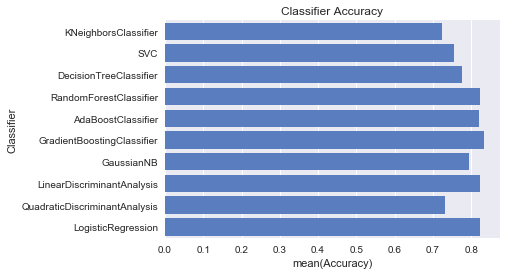

In [34]:
##Classifier Comparison
%matplotlib inline

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

##Cross validation to test models instead of split
from sklearn.cross_validation import cross_val_score

X = train.drop(['Survived'],axis=1)
y= train['Survived']
acc_dict = {}

for clf in classifiers:
    name = clf.__class__.__name__
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    score_mean = scores.mean()
    if name in acc_dict:
        acc_dict[name] += score_mean
    else:
        acc_dict[name] = score_mean
    
for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

##Cross validation without sklearn cross_validation
# sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

# X = train.iloc[0::, 1::]
# y = train.iloc[0::, 0]

# acc_dict = {}

# #cross validate each model
# for train_index, test_index in sss.split(X, y):
# 	X_train, X_test = X.iloc[train_index], X.iloc[test_index]
# 	y_train, y_test = y[train_index], y[test_index]
    
# 	for clf in classifiers:
# 		name = clf.__class__.__name__
# 		clf.fit(X_train, y_train)
# 		train_predictions = clf.predict(X_test)
# 		acc = accuracy_score(y_test, train_predictions)
# 		if name in acc_dict:
# 			acc_dict[name] += acc
# 		else:
# 			acc_dict[name] = acc

# for clf in acc_dict:
# 	acc_dict[clf] = acc_dict[clf] / 10.0
# 	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
# 	log = log.append(log_entry)

Gradient Boosting Classifier looks better than other models without parameter tuning

In [36]:
acc_dict

{'AdaBoostClassifier': 0.82045823402564966,
 'DecisionTreeClassifier': 0.77565060719555101,
 'GaussianNB': 0.79485245715582775,
 'GradientBoostingClassifier': 0.83283026898195445,
 'KNeighborsClassifier': 0.72291482238111449,
 'LinearDiscriminantAnalysis': 0.8226668369084098,
 'LogisticRegression': 0.82264158438315749,
 'QuadraticDiscriminantAnalysis': 0.73215582794234479,
 'RandomForestClassifier': 0.82262995119736693,
 'SVC': 0.75552576325048237}

In [39]:
acc_dict.keys()

dict_keys(['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'GaussianNB', 'LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis', 'LogisticRegression'])

In [42]:
list = []
for key, val in acc_dict.items():
    if val >= 0.8:
        list.append(key)
print(list)

['RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'LinearDiscriminantAnalysis', 'LogisticRegression']


In [33]:
random_state=5
X_train, X_test, Y_train, Y_test = train_test_split(combine[0].drop(["Survived"], axis=1)\
                , combine[0]["Survived"], train_size=0.8, random_state=random_state)

In [69]:
#Gradient Boosting Classifier tuning
gbc = GradientBoostingClassifier()
params = [{'n_estimators':[15,20,25,30,35],
          'max_features':[0.001, 0.05, 0.1, 0.2,0.4],
          'max_depth':[1,2,3,5,7,9,11]}]

score = 'f1'
clf = GridSearchCV(
    gbc, # 識別器
    params, # 最適化したいパラメータセット 
    cv=5, # 交差検定の回数
    scoring='%s_weighted' % score ) # モデルの評価関数の指定

clf.fit(X_train, Y_train)
clf.best_params_
y_pred = clf.best_estimator_.predict(X_test)
print(clf.best_estimator_)

print('Accuracy on Validation Set: {:.3f}'.format(accuracy_score(Y_train, Y_val_pred)))
print(classification_report(Y_test, y_pred))

pd.DataFrame(confusion_matrix(Y_test, y_pred, labels=[0, 1]))
##view the feature importances for this model to see which factors contribute the most to survival
#pd.DataFrame(gsf.best_estimator_.feature_importances_, index=X.columns, columns=["Feature Importance"]).sort("Feature Importance", ascending=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=0.2, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=25, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.85      0.89      0.87       111
          1       0.81      0.74      0.77        68

avg / total       0.83      0.83      0.83       179



,0,1
0,99,12
1,18,50


In [80]:
##SVC tuning

params = [
     {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
     ]

score = 'f1'
clf = GridSearchCV(
    SVC(), # 識別器
    params, # 最適化したいパラメータセット 
    cv=5, # 交差検定の回数
    scoring='%s_weighted' % score ) # モデルの評価関数の指定

clf.fit(X_train, Y_train)
clf.best_params_
y_pred = clf.best_estimator_.predict(X_test)
print(clf.best_estimator_)


print('Accuracy on Validation Set: {:.3f}'.format(accuracy_score(Y_test, Y_val_pred)))
print(classification_report(Y_test, y_pred))

pd.DataFrame(confusion_matrix(Y_test, y_pred, labels=[0, 1]))

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy on Validation Set: 0.849
             precision    recall  f1-score   support

          0       0.87      0.90      0.88       111
          1       0.83      0.78      0.80        68

avg / total       0.85      0.85      0.85       179



,0,1
0,100,11
1,15,53


In [77]:
clf = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=0.2, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=25, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

clf.fit(X_train, Y_train)
Y_train_pred = clf.predict(X_train)
Y_val_pred = clf.predict(X_test)

print('Accuracy on Validation Set: {:.3f}'.format(accuracy_score(Y_test, Y_val_pred)))
print(classification_report(Y_test, Y_val_pred))
pd.DataFrame(confusion_matrix(Y_test, Y_val_pred, labels=[0, 1]))

Accuracy on Validation Set: 0.844
             precision    recall  f1-score   support

          0       0.85      0.91      0.88       111
          1       0.83      0.74      0.78        68

avg / total       0.84      0.84      0.84       179



,0,1
0,101,10
1,18,50


In [81]:
clf = SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

clf.fit(X_train, Y_train)
Y_train_pred = clf.predict(X_train)
Y_val_pred = clf.predict(X_test)

print('Accuracy on Validation Set: {:.3f}'.format(accuracy_score(Y_test, Y_val_pred)))
print(classification_report(Y_test, Y_val_pred))
pd.DataFrame(confusion_matrix(Y_test, Y_val_pred, labels=[0, 1]))

Accuracy on Validation Set: 0.855
             precision    recall  f1-score   support

          0       0.87      0.90      0.88       111
          1       0.83      0.78      0.80        68

avg / total       0.85      0.85      0.85       179



,0,1
0,100,11
1,15,53


In [78]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=4, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

clf.fit(X_train, Y_train)
Y_train_pred = clf.predict(X_train)
Y_val_pred = clf.predict(X_test)

print('Accuracy on Validation Set: {:.3f}'.format(accuracy_score(Y_test, Y_val_pred)))
print(classification_report(Y_test, Y_val_pred))
pd.DataFrame(confusion_matrix(Y_test, Y_val_pred, labels=[0, 1]))

Accuracy on Validation Set: 0.866
             precision    recall  f1-score   support

          0       0.86      0.94      0.90       111
          1       0.88      0.75      0.81        68

avg / total       0.87      0.87      0.86       179



,0,1
0,104,7
1,17,51


In [79]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

clf.fit(X_train, Y_train)
Y_train_pred = clf.predict(X_train)
Y_val_pred = clf.predict(X_test)

print('Accuracy on Validation Set: {:.3f}'.format(accuracy_score(Y_test, Y_val_pred)))
print(classification_report(Y_test, Y_val_pred))
pd.DataFrame(confusion_matrix(Y_test, Y_val_pred, labels=[0, 1]))

Accuracy on Validation Set: 0.849
             precision    recall  f1-score   support

          0       0.85      0.92      0.88       111
          1       0.85      0.74      0.79        68

avg / total       0.85      0.85      0.85       179



,0,1
0,102,9
1,18,50


In [ ]:
# #SVC

# params = [
#      {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
#      ]
# score = 'f1'
# clf = GridSearchCV(
#     SVC(), # 識別器
#     params, # 最適化したいパラメータセット 
#     cv=5, # 交差検定の回数
#     scoring='%s_weighted' % score ) # モデルの評価関数の指定
    
# clf.fit(X_train, Y_train)

# print(clf.grid_scores_)
# print(clf.best_params_)
# print(clf.best_estimator_)
# # # # Support Vector Machines
# # svc = SVC(kernel='rbf',C=1000, gamma=0.00001)
# svc = clf.best_estimator_
# # svc = SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
# #   decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
# #   max_iter=-1, probability=False, random_state=None, shrinking=True,
# #   tol=0.001, verbose=False)
# svc.fit(X_train, Y_train)
# Y_train_pred = svc.predict(X_train)
# Y_val_pred = svc.predict(X_val)
# acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
# cm = confusion_matrix(Y_val, Y_val_pred)
# print(cm)
# print('Accuracy on Training Set: {:.3f}'.format(accuracy_score(Y_train, Y_train_pred)))
# print('Accuracy on Validation Set: {:.3f}'.format(accuracy_score(Y_val, Y_val_pred)))
# print('recall on Validation Set: {:.3f}'.format(recall_score(Y_val, Y_val_pred)))
# print('precision on Validation Set: {:.3f}'.format(precision_score(Y_val, Y_val_pred)))
# print('f1 on Validation Set: {:.3f}'.format(f1_score(Y_val, Y_val_pred)))
# print("SVC={}".format(acc_svc))

In [ ]:
# ##Cross validation to test models instead of split
# from sklearn.cross_validation import cross_val_score

# X = train.drop(['Survived'],axis=1)
# Y= train['Survived']

# clf = RandomForestClassifier()
# scores = cross_val_score(clf, X, Y, cv=10, scoring='accuracy')

# print(scores)
# print(scores.mean())

## Grid search CV

In [ ]:
# #Search for an optimal value of k for KNN
# k_range = range(1,31)
# k_scores = []
# for k in k_range:
#     knn=KNeighborsClassifier(n_neghbors=k)
#     scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
#     k_scores.append(scores.mean())
# print k_scores

# #plot the value of k for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(k_range, k_scores)
# plt.xlabel("Value of k for KNN")
# plt.label('Cross-Validated Accuracy')

In [ ]:
# #above rewrote with GridSearchCV
# k_range = range(1,31)
# param_grid = dict(n_beighbors=k_range) #param should be searched with grid

# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# grid.fit(X,Y)

# grid.grid_scores_ #view complete result tested with gridsearch

# #to call specific value
# print grid.grid_scores_[0].parameters
# print grid.grid_scores_[0].cv_validation_scores
# print grid.grid_scores_[0].mean_validation_score

# #create a list of the mean scores only
# grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
# print(grid_mean_scores)

# #plot the results
# plt.plot(k_range, grid_mean_scores)
# plt.xlabel("Value of k for KNN")
# plt.label('Cross-Validated Accuracy')

# #examine the best model
# print(grid.best_scores_)
# print(grid.best_params_)
# print(grid.best_estimator_)

##if the gridsearch takes long, try RadamizedSearchCV which will save time

## Evaluate the model checking recall vs Percision

In [56]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

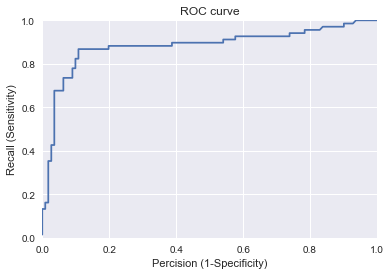

In [65]:
#plotting ROC curve
from sklearn.metrics import roc_curve

clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1] #X_test = X_val


fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob) #y_test=y_val
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC curve")
plt.xlabel("Percision (1-Specificity)")
plt.ylabel("Recall (Sensitivity)")
plt.grid(True)

In [63]:
# print(y_pred[21:31])
# #print(y_pred_prob[21:31])
# print(y_pred_prob[21:31, 1])
print(Y_test[21:31])
print(X_test[21:31])


28     1
591    1
440    1
295    0
636    0
679    1
857    1
840    0
361    0
695    0
Name: Survived, dtype: int64
     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked  Title  \
28        3    1  29.699118      0      0    7.8792         2      2   
591       1    1  52.000000      1      0   78.2667         1      3   
440       2    1  45.000000      1      1   26.2500         0      3   
295       1    0  29.699118      0      0   27.7208         1      1   
636       3    0  32.000000      0      0    7.9250         0      1   
679       1    0  36.000000      0      1  512.3292         1      1   
857       1    0  51.000000      0      0   26.5500         0      1   
840       3    0  20.000000      0      0    7.9250         0      1   
361       2    0  29.000000      1      0   27.7208         1      1   
695       2    0  52.000000      0      0   13.5000         0      1   

     ticket_str0  cabin_str0  IsAlone  IssmallFamily  IslargeFamily  
28             3  

In [69]:
#Get the point of thresholds
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1-fpr[thresholds > threshold][-1])

In [70]:
evaluate_threshold(0.5)

Sensitivity: 0.735294117647
Specificity: 0.936936936937


In [76]:
#Area under the curve AUC
from sklearn.metrics import roc_auc_score
print(roc_auc_score(Y_test, y_pred_prob))

#AUC is useful for cross val scoring to find threshold
cross_val_score(clf, X, y, cv=10, scoring='roc_auc').mean()

0.88182299947


0.87424293353705118

Seems like it's not the problem of threshold. Next: Check plot survival rate for each section to check witch factor is affecting more.

In [ ]:
##simpler code to look at recall precision
# from sklearn.ensemble import GradientBoostingClassifier
# Grad=GradientBoostingClassifier()
# n_estimators = [15,20,25,30,35]
# max_features = [0.001, 0.05, 0.1, 0.2,0.4]
# max_depth = [1,2,3,5,7,9,11]
# gsg = GridSearchCV(Grad, {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth':max_depth}, cv=5)
# gsg.fit(X, y)
# gsg.best_params_
# ypred=gsg.best_estimator_.predict(X)
# print classification_report(y, ypred)
# pd.DataFrame(confusion_matrix(y, ypred, labels=[0, 1]))

##view the feature importances for this model to see which factors contribute the most to survival
#pd.DataFrame(gsf.best_estimator_.feature_importances_, index=X.columns, columns=["Feature Importance"]).sort("Feature Importance", ascending=False)

## Feature Importance

In [77]:
pd.DataFrame(clf.feature_importances_, index=X.columns, columns=["Feature Importance"]).sort("Feature Importance", ascending=False)

/Users/mihoyamamoto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Feature Importance
Sex,0.262839
Title,0.161237
Fare,0.149049
Age,0.119957
Pclass,0.083000
cabin_str0,0.065693
ticket_str0,0.041276
IslargeFamily,0.024210
Embarked,0.021370
IssmallFamily,0.021370
